In [3]:
import numpy as np
import os
from utils.tools_1 import make_library_functions
import pickle

num_epochs = 1500
initial_lr = 1e-2
min_temp = 0.01
start_temp = 10.
library_functions = [ "(_)**2", "(_)**3"]
library_functions = make_library_functions(library_functions)
repulsion_coeff = 1e-1

with open("../data/u_10m_comp_vals_3.pkl", 'rb') as f:
    loaded_data = pickle.load(f)

# dict_keys(['lat_vals', 'lon_vals', 'train', 'test', 'val', 'U_vals', 'sing_vals', 'Vt_vals', 'r95'])

S_train = loaded_data['train']['data']
train_times = loaded_data['train']['time']

S_test = loaded_data['test']['data']
test_times = loaded_data['test']['time']

S_val = loaded_data['val']['data']
val_times = loaded_data['val']['time']

lat_vals = loaded_data['lat_vals']
lon_vals = loaded_data['lon_vals']

r_val = loaded_data['r95']
batch_size = max(S_train.shape[1] // 256, 256)

Nh_val = S_train.shape[0]
r_val = 24
p_val = 20

m3_test_dir_1 = f'/workspace/venu_files/climate_forecasting/CAE_transf/results/wCAE_wnl_ne{num_epochs}_lib2_bs{batch_size}_lr{initial_lr}_Nval{Nh_val}_rval{r_val}_m2/'
test_pred_errs_m3_1 =  np.load(f'{m3_test_dir_1}test_pred_err_vals.npy')

m3_test_dir_2 = f'/workspace/venu_files/climate_forecasting/CAE_transf/results/wCAE_wnl_ne{num_epochs}_lib5_bs{batch_size}_lr{initial_lr}_Nval{Nh_val}_rval{r_val}_m2/'
test_pred_errs_m3_2 =  np.load(f'{m3_test_dir_2}test_pred_err_vals.npy')

m3_test_dir_3 = f'/workspace/venu_files/climate_forecasting/CAE_transf/results/wCAE_wnl_ne{num_epochs}_lib5_bs{batch_size}_lr{initial_lr}_Nval{Nh_val}_rval{r_val}_rc{repulsion_coeff}/'
test_pred_errs_m3_3 =  np.load(f'{m3_test_dir_3}test_pred_err_vals.npy')


m2_test_dir = f'/workspace/venu_files/climate_forecasting/CAE_transf/results/ne1000_bs{batch_size}_lr{initial_lr}_Nval{Nh_val}_rval20_m2/'
test_pred_errs_m2 = np.load(f'{m2_test_dir}test_pred_err_vals.npy')



0.50697553 : 0.9434957
0.50393677 : 0.96233904
0.51105076 : 0.948217
0.5077509 : 0.95797276


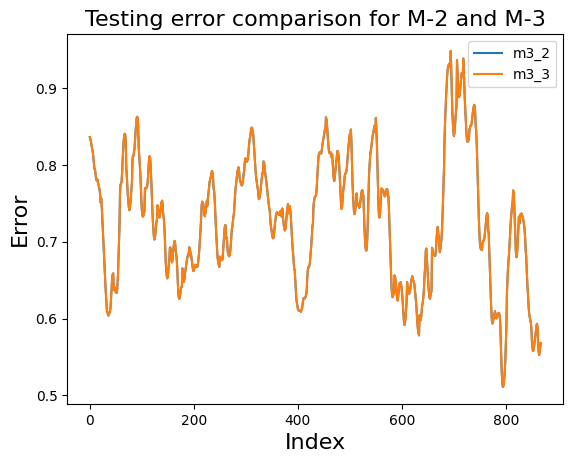

In [6]:
import matplotlib.pyplot as plt
# plt.plot(test_pred_errs_m2, label = 'm2')
# plt.plot(test_pred_errs_m3_1, label = 'm3_1')
plt.plot(test_pred_errs_m3_2, label = 'm3_2')
plt.plot(test_pred_errs_m3_2, label = 'm3_3')
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.title('Testing error comparison for M-2 and M-3', fontsize = 16)
plt.savefig(f'{m3_test_dir_2}comparison_roms_m2_m312.png')
plt.legend()


print(test_pred_errs_m2.min(), ":", test_pred_errs_m2.max() )
print(test_pred_errs_m3_1.min(), ":", test_pred_errs_m3_1.max() )
print(test_pred_errs_m3_2.min(), ":", test_pred_errs_m3_2.max() )
print(test_pred_errs_m3_3.min(), ":", test_pred_errs_m3_3.max() )

